In [2]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('history_cleaned.csv')
df.shape
df.shape

(6722, 2)

In [7]:
df.head()

,Time,domain
0,2021-10-03 16:15:34,gist.github.com
1,2021-10-03 16:03:13,www.google.com
2,2021-10-03 16:03:06,www.google.com
3,2021-10-03 16:01:00,stackoverflow.com
4,2021-10-03 16:00:58,www.google.com


In [8]:
df.tail()

,Time,domain
6717,1600-12-31 19:00:00,mdcourts.gov
6718,1600-12-31 19:00:00,www.sciencedirect.com
6719,1600-12-31 19:00:00,www.sciencedirect.com
6720,1600-12-31 19:00:00,columbiauniversity.zoom.us
6721,1600-12-31 19:00:00,www.youtube.com


In [9]:
df.dtypes

Time      object
domain    object
dtype: object

In [10]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

28

In [11]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [12]:
df['Time'] = pd.to_datetime(df['Time'])

In [13]:
df['domain'].value_counts()[:50]

www.google.com                        1734
www.amazon.com                         743
blackboard.umbc.edu                    247
github.com                             151
www.facebook.com                       142
old.reddit.com                         131
www.ebay.com                           117
www.reddit.com                         112
www.adidas.com                         100
www.southwest.com                       96
mail.google.com                         86
www.lenovo.com                          78
www.airbnb.com                          76
www.lowes.com                           75
stackoverflow.com                       62
www.youtube.com                         57
www.netflix.com                         55
www.perksatwork.com                     54
umbc.webex.com                          48
cjpalhdlnbpafiamejdnhcphjbkeiagm        48
webauth.umbc.edu                        46
my3.my.umbc.edu                         44
docs.google.com                         36
hangouts.go

<AxesSubplot:>

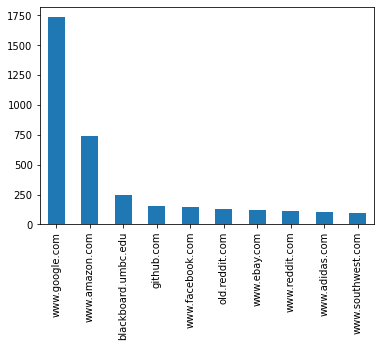

In [14]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [15]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0      16
1       4
2      34
3       1
5      53
6     111
7     251
8     181
9     216
10    216
11    477
12    428
13    561
14    764
15    854
16    635
17    564
18    337
19    319
20    236
21    255
22    123
23     58
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

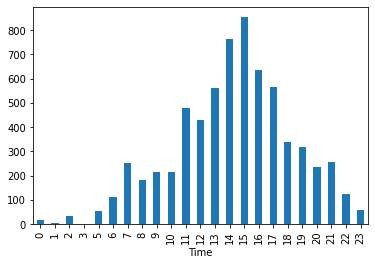

In [16]:
hourly_counts.plot.bar()

In [17]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2021-10-03 16:15:34,gist.github.com,Sunday,6
1,2021-10-03 16:03:13,www.google.com,Sunday,6
2,2021-10-03 16:03:06,www.google.com,Sunday,6
3,2021-10-03 16:01:00,stackoverflow.com,Sunday,6
4,2021-10-03 16:00:58,www.google.com,Sunday,6


In [18]:
df['Day'].value_counts()

Saturday     1407
Thursday     1094
Sunday       1047
Tuesday       839
Friday        803
Wednesday     791
Monday        713
Name: Day, dtype: int64

In [19]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0     713
1     839
2     791
3    1094
4     803
5    1407
6    1047
Name: DayIndex, dtype: int64

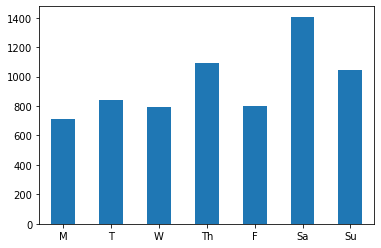

In [20]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [21]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2021-10-03 16:15:34,gist.github.com,Sunday,6,True
1,2021-10-03 16:03:13,www.google.com,Sunday,6,True
2,2021-10-03 16:03:06,www.google.com,Sunday,6,True
3,2021-10-03 16:01:00,stackoverflow.com,Sunday,6,True
4,2021-10-03 16:00:58,www.google.com,Sunday,6,True


In [22]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [23]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
0,2021-10-03 16:15:34,gist.github.com,Sunday,6,True
1,2021-10-03 16:03:13,www.google.com,Sunday,6,True
2,2021-10-03 16:03:06,www.google.com,Sunday,6,True
3,2021-10-03 16:01:00,stackoverflow.com,Sunday,6,True
4,2021-10-03 16:00:58,www.google.com,Sunday,6,True


In [24]:
weekday['domain'].value_counts()[:5]

www.google.com         1027
www.amazon.com          474
blackboard.umbc.edu     203
github.com              100
www.adidas.com          100
Name: domain, dtype: int64

In [25]:
weekend['domain'].value_counts()[:5]

www.google.com      707
www.amazon.com      269
www.ebay.com         82
www.facebook.com     66
old.reddit.com       58
Name: domain, dtype: int64

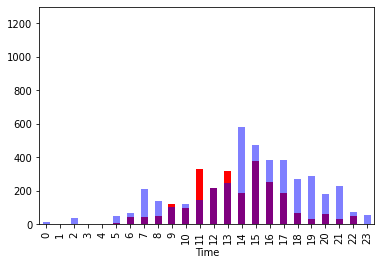

In [26]:
def show_stats(df, color, alpha=1):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.ylim([0, 1300])

    
show_stats(weekend, 'red', 1)
    
show_stats(weekday, 'blue', 0.5)


In [27]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply becasue there are more weekdays 

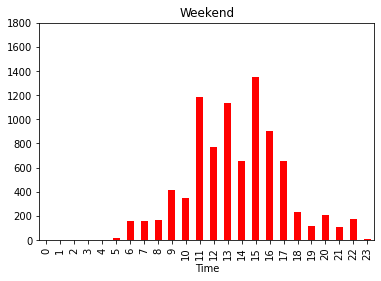

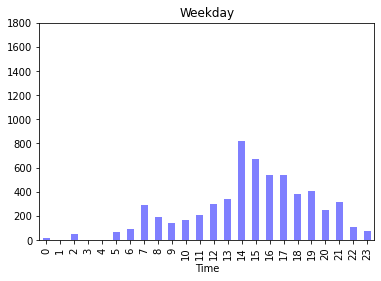

In [28]:
def show_stats(df, color, alpha=1, title='', y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)
    plt.show()


    
y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend', y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday', y_lim=y_lim)

In [29]:
df['domain'].value_counts()[:50]

www.google.com                        1734
www.amazon.com                         743
blackboard.umbc.edu                    247
github.com                             151
www.facebook.com                       142
old.reddit.com                         131
www.ebay.com                           117
www.reddit.com                         112
www.adidas.com                         100
www.southwest.com                       96
mail.google.com                         86
www.lenovo.com                          78
www.airbnb.com                          76
www.lowes.com                           75
stackoverflow.com                       62
www.youtube.com                         57
www.netflix.com                         55
www.perksatwork.com                     54
umbc.webex.com                          48
cjpalhdlnbpafiamejdnhcphjbkeiagm        48
webauth.umbc.edu                        46
my3.my.umbc.edu                         44
docs.google.com                         36
hangouts.go

In [30]:
df['domain'] = df['domain'].astype(str)

In [31]:
def get_data_for_domain(val):
    return df[ [True if val.lower() in i.lower() else False for i in df['domain'] ]]


def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

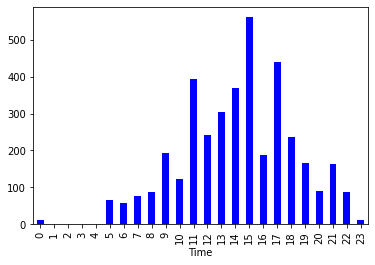

In [40]:
_= show_domain_stats('google', 'blue')

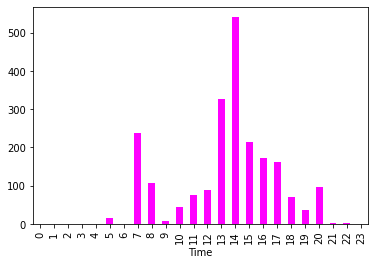

In [41]:
_ = show_domain_stats('amazon', 'magenta')


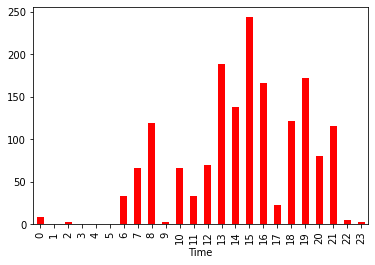

In [42]:
_ = show_domain_stats('umbc', 'red')


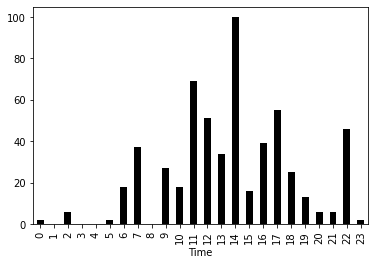

In [39]:
_=show_domain_stats('github', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

1. This is a student's personal computer. This is evidenced by the times frequenting umbc.edu and there is a safe assumption that their coursework falls under a CS discipline or has a healthy interest in CS (frequent github, use of stackoverflow, geeksforgeeks, w3schools, and excessive googling).
2. maybe (no, it's me). Most time spent online begins about noon, peaks around midday and falls precipitously in the late evening/night
3. shopaholic (amazon, adidas, lenovo, lowes, walmart, microcenter, target,ebay, offerup, poshmark, aliexpress, ) travel(airbnb, southwest, carrentals, hertz), social media(facebook)
4. used vfair platform 18 times is likely actively looking for work


### What do you think about this assignment? ( 3 sentences at most! ) 

It's a good excercise but it is pretty weird to analyze oneself from the point of view of an outsider.

__NOTE__: If you give your permission for another student to analyze your `history_cleaned.csv` please commit it with this hw file.

(Your name will stay confidencial)